# Measurement statistics for bits and qubits
## A quantum technology laboratory using Amazon Braket 

<!--
This is a quantum technology laboratory using Amazon Braket aiming to illustrate the connection between probability and quantum theory. It was originally developed for *[Physics 116: *Graduate Quantum Information Science* (Dartmouth College, Spring 2022)](http://dartgo.org/p116_s24_qis)* written by James D Whitfield and AJ Cressman. Based on AWS Quantum Technologies blogpost *["Bernoulli Line and the Bloch Sphere"](https://aws.amazon.com/blogs/quantum-computing/bernoulli-line-and-the-bloch-sphere/)* by Kanav Setia, James Whitfield, and Tyler Takeshita, also available on the [QBraid Blog](https://www.qbraid.com/blog/partner-post-aws-quantum-technologies-blog-bernoulli-line-and-the-bloch-sphere-visualizing-probability-and-quantum-states)).

The Open Education Initative at Dartmouth College is gratefully acknowledged for providing the seed sponorship for developing this lab. 

Feel free to adapt and deploy in your own course. If you decide to use it in instructional settings, please share any instructor or student feedback to james.d.whitfield at dartmouth.edu. 
-->


In [ ]:
import time
st = time.time()


In this laboratory, we will explore the connections between probability and quantum mechanics. 
The key learning objective of this laboratory is for students to understand elementary statistics and demostrate that understanding in (1) two-outcome probability theory and (2) two-outcome quantum theory. We will be using the [Amazon Braket](https://aws.amazon.com/braket) for accessing both simulators and QPUs.



## Outline
1. [Bit](#1-bit)
    - A. Theory
    - B. Measurement of a bit: statistics
2. [Qubit](#2-qubit)
    - A. Theory
    - B. Measurement of a qubit: tomography
3. [Devices (optional)](#3-devices-optional)


In [ ]:
#install libraries
!pip install amazon-braket-sdk
!pip install qutip

## 1. Bit

## 1.A. Theory

In this section of the laboratory, we will look at the measurement statistics of probability functions with only two outcomes. Before going on to quantum theory we will look at examples provided by binary event spaces. This includes the bit and the Bernoulli trials. We look at the paradigmatic example with programmatic illustrations using Amazon Braket. 

The key learning objective is to introduce the key concepts of measurement statistics before adding in any complications of quantum theory.

### Probability density vector for a bit

For a two-level, two-state, or two-outcome probability space, we have one unique number that determines the **probability density vector**. We will call this number $p$. We will label the corresponding state as 
\begin{equation}
    |p\rangle=\begin{bmatrix} p \\1-p \end{bmatrix}
\end{equation}

If $p\in\mathcal{R}$ and $0\leq p \leq 1$, it is easy to check that $|p\rangle$ is a valid probability density vector satisfying the conditions of:
- normalization 
    - $\sum_j \langle j  | p \rangle =p_0 + p_1 = p+ (1-p)= 1$
- real valued coefficent
    - $p\in \mathcal{R}$
- positive semi-definite
    - $p\geq 0 $

In the second part of the lab, we shall see these conditions extended to the probability density matrix.

###  Bernoulli trials and the Bernoulli line

We begin by introducing Bernoulli trials. A [**Bernoulli trial**](https://en.wikipedia.org/wiki/Bernoulli_trial) is the formalization of a coin flip. Each trial has two possible outcomes and which of them is realized each trial is determined by a probability density vector with only one parameter $p$. The two possible outcomes of a trial could be:
- \{"zero", "one"\}
- \{"win", "lose"\}
- \{"heads", "tails"\}
- \{"red","black"\}
- \{"a boy", "not a boy"\}
- \{A, "not "A\}

These labels for the two outcomes are meant to be suggestive of how one might think to employ the concept of Bernoulli trials and how this probability vector should be interpreted.  In some situations, $p$ is known to all parties and the outcome of a particular trial is highly important or costly e.g. \{"red", "black"\} for casino roulette or \{"boy", "not a boy"\} for parents.  Other times $p$ is unknown and the repeated measurement are done to learn $p$ e.g. \{"heads", "tails"\} for [checking whether a coin is fair](https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair). 


![image](images/bernoulli2.png)
<!--- [image](bernoulli1.png) --->


We now introduce the **Bernoulli line**. The chances of obtaining a given result in each trial is determined by the Bernoulli probability parameter, $p$, represented as a red dot in the figure below. If the probability parameter is halfway along the line between the endpoints marked Outcome 0 and Outcome 1, then the outcomes occur with equal probability. As the geometrical point (the red dot) moves towards one end or the other of the line (up or down the Z-axis) the outcomes are biased towards the corresponding pole. That is, we observe outcome 1 with a higher probability as the red dot approaches the bottom of the line and observe more 0 outcomes than 1 as the dot approaches the top of the sphere.

The correspondence between the geometrical point and the Bernoulli probability parameter, $p$, is
such that $p$ is the probability of obtaining outcome 0. The number line for parameter $p$ can be
seen as going from $p=0$ at the bottom of the line in Figure 1 to $p=1$ at the top. Note this
definition of $p$ differs from other sources where this parameter corresponds to outcome 1. We
choose this definition to be consistent with standard quantum information conventions.

We can perform a simple Bernoulli trial with Amazon Braket. Consider a Bernoulli trial with 𝑝
= 0.75 that is repeated 1000 times. In [Amazon Braket terms](https://docs.aws.amazon.com/braket/latest/developerguide/braket-terms.html), this is a **task** (a request to a device)
consisting of 1000 **shots** (each shot is a single circuit execution and measurement i.e. a trial). 

#### (Note to learners and instructors)
*This lab is designed to focus on the concepts of measurement not on the implementation. To that end, we have provided helper functions with the lab (helper.py) which encapsulate some of the code to make a more student-friendly interface. Those familiar with coding should feel free to visit and reuse the code found in [helper.py](helper.py).*

The Bernoulli task of running $n$ shots each determined by parameter $p=p_0$, can be thought of as a function $B(p,n)$. This is among the helper functions included: 


In [2]:
import helper
print(helper.run_bernoulli_task.__doc__)

run_bernoulli_task(p,n_shots=None,verbose=False,plot=True)
    
    Runs a given Bernoulli experiment.

        Args:
            p           Probability of Outcome 0

        Optional args:
            n_shots     Integer number of times to run the circuit. Default: 1000.
            verbose     Boolean to print extra. Default: False.
            plot        Boolean to create plot. Default: True.

        Returns:
            counts:     A dictionary with keys "0" and "1" containing the counts.

        
        Examples:
            >>> p=0.8
            >>> n=1000            
            >>> run_bernoulli_task(p,n)
            >>> run_bernoulli_task(p,n,verbose=True,plot=False)
    


We use the `matplotlib` for our basic plotting routines and the `numpy` package for mathematical functions.

In [3]:
# USER: for interactive figures, run: conda install -c conda-forge ipympl
# Then, replace `inline` with `widget`
# magic word for producing visualizations in notebook
%matplotlib inline

import matplotlib.pyplot as plt

#primary mathematical/scientific package of Python is numpy
import numpy as np

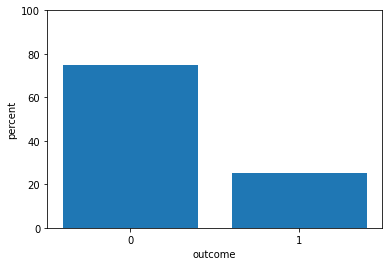

Zero counts: 75
One  counts: 25


In [4]:
helper.run_bernoulli_task(.75,100,verbose=True,plot=True);

#### Variance of a probability distribution

The outcomes of a repeated probability sampling will typically be spread across the possibilities. We can quantify this spread with a variety of measures. One of the most well known is the variance of a random variable, $X$. We introduce **the variance of a probability distribution** before talking about the **sample variance**.


The expectation value of $X$ is $$\langle K \rangle = \sum k p_k$$ and the expectation value of of $X^2$ is $\langle K^2 \rangle = \sum k^2 p_k$. Here $p_k$ is the probability of obtaining outcome $k$ upon measurement. 

For a single Bernoulli trial with known value of $p=p_0$, we have 

$$\mu=\langle K \rangle = 0 p_0 + 1 p_1 = 1-p$$

and a second moment of

$$\langle K^2\rangle = 0^2 p_0 + 1^2 p_1= 1-p$$

We can combine this to evaluate the variance formula: 
$$var(K) = \langle K^2\rangle - \langle K\rangle^2$$

## 1.A Exercises 
1. Compute the variance of $X$ given by a Bernoulli trial with parameter $p$. Plot this a function of $p$.
2. Show  $$var(X)=\langle (X-\mu)^2 \rangle$$


In [5]:
#### Answer 1.A.1 

In [6]:
#### Answer 1.A.2

## 1.B. Measurement of a bit: statistics

The history of quantum mechanics has birthed philosophical questions around the notion of measurement in quantum mechanics. This was famously tackled in [the Bohr-Einstein debates](https://en.wikipedia.org/wiki/Bohr%E2%80%93Einstein_debates). 

In this part of the lab, we will look at the classical measurement problem of a bit: [estimating the value of $p$ for a fixed but unknown Bernoulli trial](https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair). This will require us to look at several notions from probability and statistics.

The purpose of this subsection is to give one (of many) frameworks for quantifying the uncertainty of the estimate for $p$ based on how many shots we took.

Intuitively, if we take more shots we should get a better estimate. Students should be able to reason more formally about uncertainty and demonstrate their understanding using the two-outcome probability theory.



### Sample means

If we are given the Bernoulli parameter $p$, we can easily make predictions for the range of results we expect from  run of the task. However, if we perform the task and don't know the value of $p$, we will need to estimate it. We outline a basic approach to estimation and quantifying the **sample variance.**

We will estimate the true parameter $p$ with $\tilde p$. Suppose $n=n_0+n_1$ is the total number of shots while $n_0$ is the number of shots that resulted in Outcome 0 while $n_1$ is the number of shots resulting in Outcome 1. We can get a reasonable estimator by using the **sample mean** $m$:

$$m = \frac1{n}\sum^n x_j$$

Here $x_j$ is the outcome of the $j$th trial. Since the outcome is zero or one, only the ones contribute and we have

$$m=n_1/n$$

Comparing this expression to the true mean $\mu = 1-p$ tell us

$$\tilde p=1-\frac{n_1}{n} = \frac{n_0}{n}$$

is an estimator for $p$. In other words, $\tilde p$ is the proportion of '0' outcomes.


In the next cell, we will vary over $n$ and run $K=25$ repetition of `run_bernoulli_task(p,n)` function. We will plot points $(\tilde p , n)$ as well as a vertical line indicating the value of $p$ selected for all trials.

**Learners should try varying $p$ in trial and observing how the plot changes.**

(0.0, 1.0)

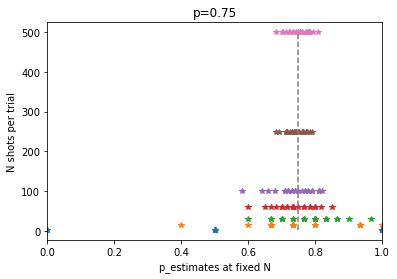

In [7]:
# Bernoulli probability parameter, p
p=.75

# n = shots per trial
ns=[2,15,30,60,100,250,500]

#trials in each experiment
K=25

for n in ns:
    
    p_estimates = []    

    for k in range(K):
        
        #run Bernoulli task
        counts = helper.run_bernoulli_task(p,n,plot=False)
        
        #estimate parameter p and uncertainty of estimate
        p_est =  counts["0"]/n
                
        #save data in array
        p_estimates.append(p_est)
            
    #plot estimates at each n
    plt.plot(p_estimates,n*np.ones(len(p_estimates)),"*")
    

#plotting the exact value
plt.plot(p*np.ones(len(ns)),ns,"--")
#plot controls
plt.xlabel("p_estimates at fixed N")
plt.ylabel("N shots per trial")
plt.title("p="+repr(p))
plt.xlim((0,1))

### Confidence intervals

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/The_Normal_Distribution.svg" alt="Z-scores and the normal distribution" width="700"> 


The normal distribution (drawn above) is the basis for much of statistics and estimation theory. We will not go deeply into the theory of statistics but we will 
delve into confidence intervals based on the normal distribution. The standard score or $Z$ score is listed at the second to last row of the above figure.

The choice of standard score dictates the confidence interval. 


| Standard score | for confidence interval|
|-----------|----------|
|Z=0.6745  | 50.00% level|
|Z=1       | 68.27% level|
|Z=2       | 95.45% level|
|Z=3.3     | 99.90% level|



We can use the [normal distribution to approximate the binomial distribution](https://www.statology.org/normal-approximation/). Then the confidence intervals above based on the normal distribution can be used.  We'll not worry too much about the theory and justification and instead state the [Wald estimate interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval_or_Wald_interval)
as 

$$ |\tilde p -p| < E_Z$$

with

$$E_Z= Z \sqrt{\frac{\tilde p(1-\tilde p)}{n}} $$

For example, at Z=.6475, the confidence interval includes 50% of a Bernoulli task to estimate $p$ with $n$ samples. Stated differently,
$$ P(p -E_{Z=.6475} <  \tilde p < p+E_{Z=.6475}) \approx \frac12 $$
The probability that our estimate is within $\pm E_{Z=0.6475}$ is one half. This means the window $p\pm E_{Z=0.6475}$ will contain approximately half of the estimates values and miss the rest. 


(0.0, 1.0)

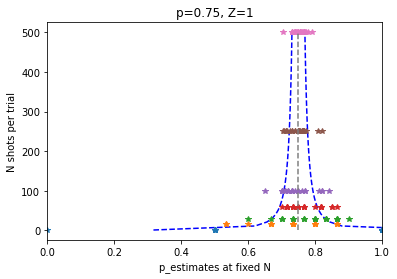

In [8]:
# Now plotting the confidence intervals on the same plot

# Bernoulli probability parameter, p, to estimate
p=.75

#z-score
Z=.6475

# N = shots per trial
ns=[2,15,30,60,100,250,500]


#upper and lower interval bounds
Es_high = []
Es_low = []

#Emxs_high = []
#Emxs_low = []

# for plotting purposes
ns_fine = np.linspace(1,max(ns))

for n in ns_fine:
    
    E = Z * np.sqrt(p*(1-p)/n)
    
    Es_high.append(p+E)
    Es_low.append(p-E)
    
    #max value of E is at p=1/2, Emax  = E_{p=1/2}
    #Emax = Z / (2*np.sqrt(n))    
    #Emxs_high.append(p+Emax)
    #Emxs_low.append(p-Emax)
    
    
#plt.plot(Emxs_high,ns_fine,"r-.")
#plt.plot(Emxs_low,ns_fine,"r-.")
    
plt.plot(Es_high,ns_fine,"b--")
plt.plot(Es_low,ns_fine,"b--")



## FROM ABOVE ##

#trials in each experiment
K=25

for n in ns:
    
    #set of the K estimated p at each value of n
    p_estimates = []    
    
    #K runs of Bernoulli task B(p,n)
    for k in range(K):
        
        #run Bernoulli task
        counts = helper.run_bernoulli_task(p,n,plot=False)
    
        #estimate parameter p and uncertainty of estimate
        p_est =  counts["0"]/n
                
        #save data in array
        p_estimates.append(p_est)

    #plot estimates at each n
    plt.plot(p_estimates,n*np.ones(len(p_estimates)),"*")

#plotting the exact value
plt.plot(p*np.ones(len(ns)),ns,"--")

plt.xlabel("p_estimates at fixed N")
plt.ylabel("N shots per trial")
plt.title("p="+repr(p)+", Z="+repr(Z))
plt.xlim((0,1))

We can go one step further and print out the fraction of the $K$ estimated $\tilde p$ that are within the confidence interval. This should match the Z-score table presented above. **Learners should try varying $Z$ and $p$ to observe how these parameters change the final plot.**

(0.0, 1.0)

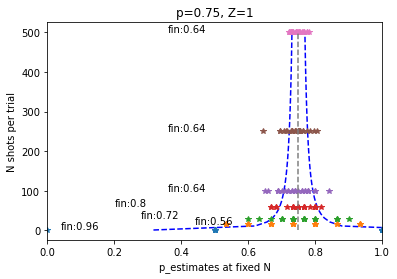

In [9]:
#Now, what fraction of the sample means are within the confidence interval


# Bernoulli probability parameter, p
p=.75

Z=1

#Number of repetitions of B(p,n)
K=25


# n = shots per trial
ns=[2,15,30,60,100,250,500]


Es_high = []
Es_low = []

# for plotting purposes
ns_fine = np.linspace(1,max(ns))

for n in ns_fine:
    
    E = Z * np.sqrt(p*(1-p)/n)
    
    
    Es_high.append(p+E)
    Es_low.append(p-E)
    
    
plt.plot(Es_high,ns_fine,"b--")
plt.plot(Es_low,ns_fine,"b--")



## FROM ANS (a):



for n in ns:

    p_estimates = []    
    
    E= Z * np.sqrt(p*(1-p)/n)
    #E= Z / (2*np.sqrt(n))     #E(p=1/2)=E_max
    
    
    #counter for estimates out of p \pm E range
    out = 0
    
    for k in range(K):
        
        #run Bernoulli task
        counts = helper.run_bernoulli_task(p,n,plot=False)
    
        #estimate parameter p and uncertainty of estimate
        p_est =  counts["0"]/n
                
        #save data in array
        p_estimates.append(p_est)
        
        #is it out of the error bound at this value of Z        
        if p_est >  p + E or p_est < p - E :
            out=out+1

    #plot estimates at each n
    plt.plot(p_estimates,n*np.ones(len(p_estimates)),"*")
    
    #uncomment the following line if you want the fraction of experiments within the error bar printed
    plt.text(out/K,n,"fin:"+repr((K-out)/K))
    
    
#plotting the exact value
plt.plot(p*np.ones(len(ns)),ns,"--")

plt.xlabel("p_estimates at fixed N")
plt.ylabel("N shots per trial")
plt.title("p="+repr(p)+", Z="+repr(Z))
plt.xlim((0,1))



 At Z=1, the confidence interval should include 68.27% of sample means estimated. **Learners should try varying the Z score and confirm that as confidence interval changes, the fraction in the bounds changes according to the Z-score table above.**

### Putting it all together
We will capture our learning from this section by writing a function that takes the count library and a Z score to compute the uncertainty bounds. This will help us in the next section and may be useful in your own work if you need to compute error bounds elsewhere.

In [10]:
def compute_uncertainty_range(counts, Z=2):
    """Compute confidence interval about p=p_0 for B(p,n)
    
    Args:
        counts      As a dictionary with keys "0" and "1" containing outcomes
        Z           The Z-value to use when computing error bounds. Default: 2
        
    Returns:
        uncert      A value indicating a meausre of uncertaintiy
    
    Standard scores for confidence intervals
    Z=0.6745  50.00% level of confidence
    Z=1       68.27% level of confidence
    Z=1.96    95.00% level of confidence
    Z=2       95.45% level of confidence
    Z=3.3     99.90% level of confidence
    """

    #total shots
    n = counts["0"]+counts["1"]
    
    #estimate parameter p and uncertainty of estimate
    p_est =  counts["0"]/n
    
    #Wald estimate
    E = Z * np.sqrt(p_est*(1-p_est)/n)

    return (p_est-E, p_est+E)

## 1.B Exercises
1. Suppose a person performs an Bernoulli task with 100 shots and obtains mean of $\mu_{100}$. If the same 100 shot outcomes were binned into groups of 10 giving  $\{\mu_10^{(1)}...\mu_{10}^{10}\}$. Will the average of the smaller means $\mu_{10}^{(k)}$ be the same as $\mu_{100}$? 
2. Try changing the value of $p$ and of $Z$. Qualitatively describe what happens when $p$ gets close to 1 or 0. Test the Z values given in the table above to see if the fraction of experiments within the confidence interval matches the theoretical predictions.
3. Often it's preferred to use a vetted library than to write our own code. Consider using [NumPy statistics](https://numpy.org/doc/stable/reference/routines.statistics.html)
or [SciPy statistics](https://docs.scipy.org/doc/scipy/tutorial/stats.html) to compute the same uncertainty bounds.

## 2. Qubit
### 2.A Theory

Now we turn toward the qubit and build off the understanding gleamed in previous section of the laboratory. We construct quantum theory directly over probability theory. Thereby, we consider the qubit as a generalization of the bit and extend the graphical intutition of the Bernoulli line to the Bloch sphere.  

### Quantum probability density matrix for a qubit

Now we turn toward the quantum setting and consider the **quantum probability density matrix** instead of a probability density vector. Note that, often, this is just called the density matrix but adding “probability” helps the name convey more meaning. The quantum probability density matrices need to satisfy the same three properties as probability density vectors, namely, the normalization constraint, the real-valued constraint, and the non-negativity constraint. This gives rise to the general form for a qubit quantum probability density matrix:

$$\rho = \frac12 \begin{bmatrix} 1+z & x-iy \\ x+iy & 1-z\end{bmatrix}=\frac12(\mathbf{1} +  x X + y Y + z Z)$$

Here, $[x,y,z]$ are the three real scalar parameters determining the state and $\vec\sigma=[X,Y,Z]$, are the [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices):


$X=\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix} $ &emsp;
$Y=\begin{bmatrix}0& -i\\ i& 0\end{bmatrix} $&emsp;
$Z=\begin{bmatrix}1 & 0\\ 0& -1\end{bmatrix}$

Note that a valid probaility density matrix must satisfy:
* normalization
  * $Tr(\rho) = 1$
* real eigenvalues 
  * $\rho  = \rho^\dagger$ 
* positive semi-definite 
  * $\lambda_j(\rho)\geq 0$ for all $j$.  
  
These are the analogous condition for a probability density vector just extended to a matrix formalism for proability density matricies.  The first two conditions follow from the parameterized form for the given probability density matrix. The last condition tells us that the $\vec r$ is confined such that we can say all valid qubit states are identified with points within a unit sphere:
$$ |\vec r|_2=\sqrt{x^2+y^2+z^2} \leq 1 $$ 
This visualization of the qubit is called the *Bloch sphere*.


### Bernoulii trials and the Bloch sphere

The Bloch sphere is used to visualize the quantum state of qubits. Valid quantum states are vectors that are within the unit sphere. The vectors with unit length are called **pure states**. Just as in the case of the Bernoulli line, the closer the state is to the north pole marked Outcome 0, the higher the probability of getting a zero on any given measurement shot in the Z direction (the red axis).

For all quantum states in the Bloch sphere, the vector projection onto the Bernoulli axis of measurement gives the Bernoulli trial probability for obtaining one of two orthogonal outcomes. In the picture, this is illustrated with the green dot along the X axis. In principle, any line through the sphere can be considered a Bernoulli line and the outcomes correspond to the poles of the Bernoulli line segment on the boundary of the sphere.  

For all quantum states in the Bloch sphere, the vector projection onto the Bernoulli axis of measurement gives the Bernoulli trial probability for obtaining one of two orthogonal outcomes. The major difference between probability and quantum theory is that the measurement axis can be rotated freely. For a bit, there is only one way to measurement. For a qubit, there are infinite number of ways to measure the state, but, thankfully, we consider measuring in three directions to obtain a full characterization of the qubit. The extraction of a complete description of a the quantum state is called **quantum tomography** and we will perform a qubit tomography experiment throughout this section using the local simulator.

<img src="images/bloch1.png" width="200">

The circuit below creates the state depicted.

In [11]:
#Standard python libraries 
import matplotlib.pyplot as plt
import numpy as np
#Amazon Braket libraries
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise, Observable
from braket.devices import LocalSimulator
# Helper functions for this lab
import helper


# State prep circuit
state_prep_circuit = Circuit()

p = 0.75  # Bernoulli parameter

# shift and rescale p from [0,1] to [-1,1] (position along axis)
h = 2 * p - 1        # Note: 2 times the probability parameter
# now the length of $\hat rho$ is 1
r = 1 
theta = np.arccos(h/r) # Students: Why is it arccos(x)? Consider the trigometry

# shift and rescale p from [0,1] to [-1/2, 1/2]
b = p-1/2
# now the length of $\hat rho$ is 1/2
R = 1/2  
q = np.arccos(b/R)

assert np.allclose(q,theta)

# Students: What do you think this does?
state_prep_circuit.ry(0, theta)

print(state_prep_circuit)

T  : |   0    |
               
q0 : -Ry(1.05)-

T  : |   0    |


Below we will reuse the same state preparation circuit and only modify its measurement.

### 2.A Exercises 
1. If a variable $x$ ranges from $[0,1]$, how can we convert this to a variable on range [-1,1]? (Hint: think through the code above). We will perfrom this conversion many time going from a probability to the qubit state's vector as a bias.


*for learners with an understanding of polar coordinates*

2. If we have vector $\vec \rho$ with $r_y=0$ and $r_z=h$. Suppose the length of the vector is 1/2. In terms of $h$, what is the angle between $\vec r$ and the Z axis? 
3. Draw a picture of the Bloch sphere (feel free to draw it in the X-Z plane for simplicity), then determine the relationship between $p=p_0$ and $h$. You should find that $p=(2h+1)/2$.  (If instead of considering $\vec r$ to have length 1/2, we had assumed it was unit length then you should find $p=(h+1)/2$)


*for learners with an understanding of linear algebra*

4. The trace is the sum of the eigenvalues and the determinant is the product of the eigenvalues. Since we are only considering two outcome quantum probability density matrices, these two formulas:
 - $Tr(\rho)  = \lambda_0(\rho) + \lambda_1(\rho) = \rho_{00}+\rho_{11}$
 - $det(\rho) = \lambda_0(\rho) \lambda_1(\rho) $
 
 are sufficent to get spectrum of $\rho$. Compute the determinant using the standard expansion then get the    conditions for the wave function to be *pure* i.e. $\lambda_0(\rho)=1$ and $\lambda_1(\rho)=0$.



### 2.B Measurement

In this section, we illustrate how to perform quantum measurements of the qubit state. This section serves as an illustration of how to perform qubit tomography (attempting to infer the quantum state via measurement). In each of the subsections below, the quantum state is measured in various directions. 

We do the measurement in Z-direction first since it is the default basis of measurement for devices on Amazon Braket. 

The probability of getting outcomes along any of the axes X, Y, or Z results from using the famous Pauli matrices as observables
\begin{align*}
X&=\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix} &	
Y&=\begin{bmatrix}0& -i\\ i& 0\end{bmatrix} &
Z&=\begin{bmatrix}1 & 0\\ 0& -1\end{bmatrix}    
\end{align*}

Recall the expectation value formula given above: $\langle K \rangle = \sum k p_k  = \vec p . \vec k$. We now generalize this for probability density matricies as 
$$\langle K \rangle  = \sum_{ij} \rho_{ij} K_{ij}^*= Tr[K\rho]$$
When $K_{ij}=\delta_{ij}k_j$ and $\rho_{ij} = p_j$, we get back the original expected value formula.


We can perform the measurement of the various observable by rotating the Bloch sphere before measurement or by requesting via the SDK that the sampling be performed on a different axis than $Z$.




In [12]:
#Control parameters (learners please play around with various settings)

nshots=1000
zscore = 1.960   #95% confidence interval

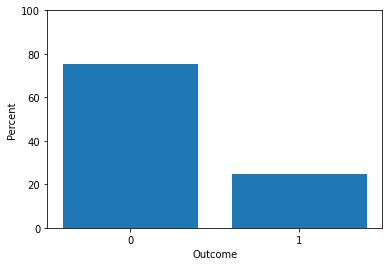

In [13]:
# Amazon Braket defaults to measurement in the Z basis 
# following usual quantum information conventions

#run the circuit sampling task with the helper function
counts = helper.run_circuit_task1(state_prep_circuit,nshots)

#probability on range [0,1]
p=counts["0"]/nshots
plow,phigh = compute_uncertainty_range(counts, zscore)

# qubit state, z direction. Bias on range [-1,1]
zbias = 2*p-1 
zlow = 2 * plow  -1
zhigh = 2 * phigh  -1

Next, we consider measurement in alternative directions graphically.

<img src="images/bloch2.png" width="200">

In the figure, the projection of the state $\rho$ in two different measurement bases with the red axis corresponding to measurement in the $Z$ basis. The two outcomes along the $X$ axis, in green, are canonically labelled as Outcome $+$ and Outcome $-$. The green dot on the axis is the projection of $\rho$ and gives the probability of obtaining Outcome $+$ in the $X$ direction.

#### 2.B.x[optional] Performing X measurements using circuits 

In the next two cells, we use measurement circuits to adjust the basis of measurement. First, we use the Hadamard transformation to convert from the $Z$ to $X$ basis and then we use a rotation about the $Y$ axis to move the $Z$ into the $X$ axis. These two measurement circuits should be have identitical measurement statistics.

<!-- This section is just to illustrate how measurement circuits can be used to perform measurements in arbitrary direction on the Bloch sphere. It is optional because we will use the `ResultsType` to measure -->

In [14]:
# Same state preparation circuit but now we append a measurement circuit with Hadamard

# Measurement circuit:
measurement_circuit = Circuit()

# Students: What gate does ".h(0)" refer to? And what does it do?
measurement_circuit.h(0)

# Note: circuits can be added -- measurement_circuit is appended to the end of state_prep_circuit
cir = state_prep_circuit + measurement_circuit

counts = helper.run_circuit_task1(cir, nshots,verbose=True,plot=False)
print(counts)

Counter({'0': 935, '1': 65})
Zero counts: 935
One  counts: 65
Counter({'0': 935, '1': 65})


Counter({'0': 938, '1': 62})


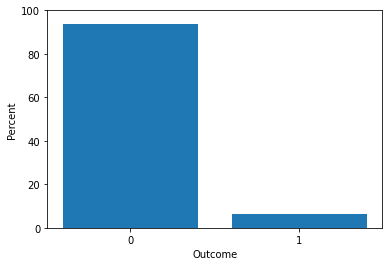

In [15]:
# Same state preparation circuit but now we append a measurement circuit with Ry rotation

# Measurement circuit:
measurement_circuit = Circuit()

# Note: it is negative because the measurement circuit acts on < 0 | as U_rot^\dag
measurement_circuit.ry(0, -np.pi / 2)

cir = state_prep_circuit + measurement_circuit

counts = helper.run_circuit_task1(cir, nshots)
print(counts)

#### 2.B.x Performing X measurements using using the Observable class

When measuring the state in alternative directions, we can change the observable being measured using [results types](https://docs.aws.amazon.com/braket/latest/developerguide/braket-result-types.html) to select the observable being measured using the `sample` method of the Circuit.

Counter({'0': 923, '1': 77})


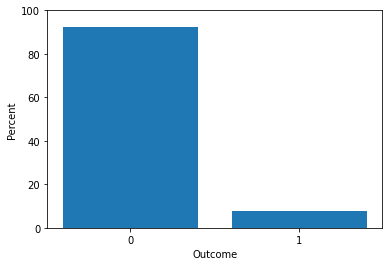

In [16]:
#we deep copy here so we don't change the original state prep circuit
cir = state_prep_circuit.copy()

cir.sample(observable=Observable.X())

counts = helper.run_circuit_task1(cir, nshots)
print(counts)


#probability on range [0,1]
p=counts["0"]/nshots
plow,phigh = compute_uncertainty_range(counts, zscore)

#bais on [-1,1]
xbias = 2*p-1 
xlow = 2 * plow  -1
xhigh = 2 * phigh  -1

#### 2.B.y Measurement of the Y observable
We will give the measurement circuit (using the $R_x$ gate) and using the SDK. 

**Instructor's note:** If students do not know how gates work, then please use the SDK and the discussion of gates can be optional.

In [17]:
# Measurement circuit:
measurement_circuit = Circuit()
# Note: it is negative because the measurement circuit acts on < 0 | as U_rot^\dag
measurement_circuit.rx(0, -np.pi / 2)

cir = state_prep_circuit + measurement_circuit


counts = helper.run_circuit_task1(cir,plot=False)
print(counts)

Counter({'1': 521, '0': 479})


In [18]:
#we deep copy here so we don't change the original state prep circuit
cir = state_prep_circuit.copy()

cir.sample(observable=Observable.Y())

counts = helper.run_circuit_task1(cir,plot=False)
print(counts)


#probability on range [0,1]
p=counts["0"]/nshots
plow,phigh = compute_uncertainty_range(counts, zscore)

#bais on [-1,1]
ybias = 2*p-1 
ylow = 2 * plow  -1
yhigh = 2 * phigh  -1

Counter({'0': 520, '1': 480})


In [19]:
print("[lower bound, parameter estimated, and upper bounds] for x,y,z")

np.set_printoptions(precision=6)
print(np.array([(xlow,xbias,xhigh),(ylow,ybias,yhigh),(zlow,zbias,zhigh)]))
np.set_printoptions(precision=8)

[lower bound, parameter estimated, and upper bounds] for x,y,z
[[ 0.812953  0.846     0.879047]
 [-0.021931  0.04      0.101931]
 [ 0.450467  0.504     0.557533]]


### Putting it all together: Bloch sphere visualization

We now use the `qutip` package to handle the plotting of our Bloch sphere plot.

In [20]:
import qutip

In [21]:
## EXACT STATE
#Pull the exact wave function from the SDK
cir = state_prep_circuit.copy() 
cir.state_vector()
ans = LocalSimulator().run(cir).result()
wf= ans.result_types[0].value
#

print("\psi = "+repr(wf[0])+" | 0 >  + "+repr(wf[1])+" | 1 >")

\psi = (0.8660254037844386+0j) | 0 >  + (0.5+0j) | 1 >


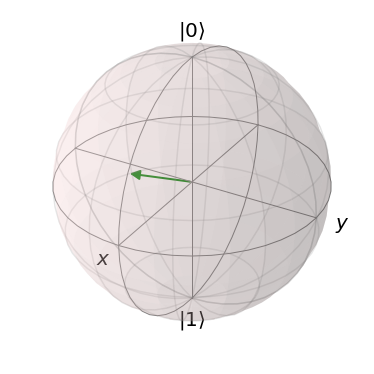

In [22]:
b=qutip.Bloch()

b.add_states(wf[0]*qutip.basis(2,0) + wf[1]*qutip.basis(2,1))
b.vector_width=2


# Azimuthal and Elevation viewing angles: Default [-60,30]
# Learners: try adjusting these values

#b.view([-60,30])

b.show()

LEGEND
-  green is the exact state

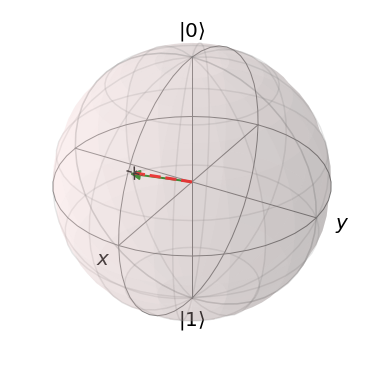

In [23]:
## RECONSTRUCTED STATE

#uncomment this line if you want to remove the exact state
#b=qutip.Bloch()

#estimated state
x=xbias
y=ybias
z=zbias

#error bars
x0 = xlow
x1 = xhigh

y0 = ylow
y1 = yhigh

z0 = zlow
z1 = zhigh


# 
b.add_line([0,0,0],[x,y,z],"r--",linewidth=3)

b.add_line([x0,y,z],[x1,y,z],"k--")
b.add_line([x,y0,z],[x,y1,z],"k--")
b.add_line([x,y,z0],[x,y,z1],"k--")

#b.add_points([x,y,z])
b.show()

LEGEND
-  green is the exact state
-  red dashed is the simulator estimate (error bars in black)

### 2.B Exercises
1. Think of a quantum experiment with $10^6$ shots taken per direction? What is volume of the confidence interval for Z=2? 
2. Try checking if the fraction of the estimated qubit bias vectors within the confidence interval matches the theoretical predictions for the Z-score choosen.

## 3. Devices [optional]

In this optional final section of the laboratory, we look at running the same experiments on quantum devices. This final section involves examining the state obtained from a real quantum device. This cannot be done with the local simulator and requires an AWS account or other methods of accessing Amazon Braket e.g. qbraid.com. 

With what we've learned so far in this lab, we will compare the simulator and quantum device measurement statistics and plot the exact state, the estimate from the simulator, and the estimate from the quantum processing units. We will also show how to [track and estimate costs](https://aws.amazon.com/blogs/quantum-computing/managing-the-cost-of-your-experiments-in-amazon-braket/).

First we look at the devices available. From the [docs](https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html) we have the following list of [quantum devices](https://aws.amazon.com/braket/quantum-computers/)

In [38]:
from braket.aws import AwsDevice

#https://aws.amazon.com/braket/quantum-computers/
#https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html    
    
# device = LocalSimulator()                                                             #Local State Vector Simulator
# device = LocalSimulator("default")                                                    #Local State Vector Simulator
# device = LocalSimulator(backend="default")                                            #Local State Vector Simulator
# device = LocalSimulator(backend="braket_sv")                                          #Local State Vector Simulator
# device = LocalSimulator(backend="braket_dm")                                          #Local Density Matrix Simulator
# device = LocalSimulator(backend="braket_ahs")                                         #Local Analog Hamiltonian Simulation
# device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/sv1')            #SV1
# device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/tn1')            #TN1
# device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/dm1')            #DM1
# device = AwsDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Harmony')               #IonQ
# device = AwsDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1')                #IonQ
# device = AwsDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Aria-2')                #IonQ
# device = AwsDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Forte-1')               #IonQ
device = AwsDevice('arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet')                #IQM Garnet
# device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')                   #OQC Lucy
# device = AwsDevice('arn:aws:braket:us-east-1::device/qpu/quera/Aquila')               #QuEra Aquila
# device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3')          #Rigetti Aspen-M-3

Let's check the price for the device selected.

In [39]:
# get device properties
print("Cost estimate for sampling XYZ dirs with",nshots,"shots each\n")
print("$"+repr(device.properties.service.deviceCost.price)+ " per " + device.properties.service.deviceCost.unit+" times "+repr(nshots*3)+" shots")
print("equals $"+repr(3*nshots*device.properties.service.deviceCost.price)+" estimated cost")

Cost estimate for sampling XYZ dirs with 1000 shots each

$0.00035 per shot times 3000 shots
equals $1.05 estimated cost


**By default this notebook does not run on a quantum device.**

In [ ]:


from braket.devices import LocalSimulator
device = LocalSimulator()


## Uncomment the next line to run on the quantum device IQM
# device = AwsDevice('arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet')                #IQM Garnet

Now we will now use Braket SDK's [cost tracking](https://aws.amazon.com/blogs/quantum-computing/managing-the-cost-of-your-experiments-in-amazon-braket/) to track the cost of running this example.

In [40]:
from braket.tracking import Tracker
t = Tracker().start()

In [41]:
#circuits
cirx= state_prep_circuit.copy()
cirx.sample(observable=Observable.X())

ciry= state_prep_circuit.copy()
ciry.sample(observable=Observable.Y())

cirz= state_prep_circuit.copy()
cirz.sample(observable=Observable.Z())

Circuit('instructions': [Instruction('operator': Ry('angle': 1.0471975511965979, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]))], 'result_types': [Sample(observable=Z('qubit_count': 1), target=QubitSet([]))])

In [28]:
print(helper.run_circuit_task1.__doc__)

run_circuit_task1(circuit,n_shots=1000, device=None, verbose=False, plot=True)
    Runs a given single qubit experiment.

        Args:
            circuit

        Optional args:
            n_shots     Integer number of times to run the circuit. Default: 1000.
            device      The default device is the LocalSimulator
            verbose     Boolean variable for printing extra output. Default: False.
            plot        Boolean to create plot. Default: True.

        Returns:
            counts:     A dictionary with keys "0" and "1" containing the counts.

        Examples:
            >>> circuit = Circuit().h(0)
            >>> run_circuit_task1(circuit)
            >>> run_circuit_task1(circuit,n_shots=100)
            >>> run_circuit_task1(circuit,n_shots=300,verbose=True,plot=False)
    


In [42]:
#sampling from device
countsx = helper.run_circuit_task1(cirx,n_shots=nshots,device=device,plot=False)
countsy = helper.run_circuit_task1(ciry,n_shots=nshots,device=device,plot=False)
countsz = helper.run_circuit_task1(cirz,n_shots=nshots,device=device,plot=False)

In [43]:
t.stop()
print("Task Summary")
print(t.quantum_tasks_statistics())
print(f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.3f} USD")

Task Summary
{'arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy': {'shots': 3000, 'tasks': {'COMPLETED': 3}}}
Estimated cost to run this example: 1.950 USD


### Process data

In [31]:
#probability on range [0,1]
px=countsx["0"]/nshots
plowx,phighx = compute_uncertainty_range(countsx, zscore)

py=countsy["0"]/nshots
plowy,phighy = compute_uncertainty_range(countsy, zscore)

pz=countsz["0"]/nshots
plowz,phighz = compute_uncertainty_range(countsz, zscore)


#bais on [-1,1]
xbias = 2*px-1 
xlow = 2 * plowx  -1
xhigh = 2 * phighx  -1

ybias = 2*py-1 
ylow = 2 * plowy  -1
yhigh = 2 * phighy  -1

zbias = 2*pz-1 
zlow = 2 * plowz  -1
zhigh = 2 * phighz  -1

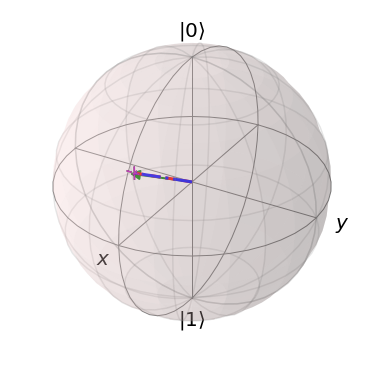

In [32]:
## EXPERIMENTAL STATE

#uncomment this line if you want to remove the exact state
#b=qutip.Bloch()

#Add device measured state to plot
b.add_line([0,0,0],[x,y,z],"b-.",linewidth=3)

b.add_line([x0,y,z],[x1,y,z],"m--")
b.add_line([x,y0,z],[x,y1,z],"m--")
b.add_line([x,y,z0],[x,y,z1],"m--")   

# Azimuthal and Elevation viewing angles: Default [-60,30]
# Learners: try adjusting these values

#b.view([-60,30])

b.show()

LEGEND
-  green is the exact state
-  red dashed is the simulator estimate (error bars in black)
-  blue dash-dotted is the device estimate (error bars in magenta)


## Conclusion

Congratulations! You've completed the laboratory. We have looked at measurement of the bit and of the qubit. We have explored statistical estimation theory to introduce confidence intervals. These confidence intervals decreased $1/\sqrt{N}$ with the number of shots taken per task being $N$.

The next step is to go beyond single qubit where the interesting subject of entanglement emerges front and center. The correlation between two statistical random variables is provably weaker than the correlations between entangled quantum systems. This was the subject of the [2022 Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2022/).

For learners interested in the mathematics of estimation, *quantum metrology* is an interesting direction to explore. Quantum metrology is the study of quantum effects that allow for higher precision measurements and often achieve a quadratic improvement i.e. $1/\sqrt{N}$ error to $1/N$ error.

In [33]:
et = time.time()
print("Execution time for notebook: ",et-st, " seconds")

Execution time for notebook:  64.88370680809021  seconds
